In [1]:
#!pip install nltk

In [24]:
#!pip install genism

ERROR: Could not find a version that satisfies the requirement genism
ERROR: No matching distribution found for genism


In [3]:
#!pip install pattern

  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332723 sha256=7c2d6a40c65a8a41c9bbe5478030eae8914f4af27113f603cbb55e507b56f872
  Stored in directory: c:\users\offic\appdata\local\pip\cache\wheels\ec\ce\8f\bccc2d04f3a25a5a1dd19165b2855ad3203975f25edd5838d6
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184600 sha256=90b14b7e61cf644717ca562e4f430024ac3104900d35cf70f7432518f8f02798
  Stored in directory: c:\users\offic\appdata\local\pip\cache\wheels\32\b8\b2\c4c2b95765e615fe139b0b17b5ea7c0e1b6519b0a9ec8fb34d
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=82c9f11c88ed221007ebe07ec578e4d51025dcf8a530e9e54cd63d5e920f29b9
  Stored in directory: c:\users\offic\appdata\local\pip\cache\wheels\83\63\2f\117884c3b19d46b64d3d61690333aa80c88dc14050e269c546
Successfully built pattern python-docx sgmllib3k


In [5]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# import dataset
df = pd.read_csv("rating_prediction.csv")
df.head()

,Unnamed: 0,Ratings,Review
0,0,5.0,This is the best laptop in this range.I reciev...
1,1,5.0,Good product as used of now.... Everything is ...
2,2,5.0,AWESOME LAPTOP. It supports many high spec gam...
3,3,4.0,For that price... it's exceptionally good. Pla...
4,4,4.0,RAM upgrade is must do because the useable RAM...


In [7]:
df.shape

(23883, 3)

In [8]:
df.isnull().sum()

Unnamed: 0     0
Ratings        0
Review        56
dtype: int64

In [9]:
df['Ratings'].value_counts()

5.0    8915
1.0    6669
4.0    3497
3.0    2638
2.0    2164
Name: Ratings, dtype: int64

In [10]:
df=df.dropna(how='any',axis=0)

In [11]:
df.isnull().sum()

Unnamed: 0    0
Ratings       0
Review        0
dtype: int64

In [12]:
df.shape

(23827, 3)

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
avg=df['Ratings'].mean()
avg=round(avg,1)
print("average rating given by users ",avg)

average rating given by users  3.2


In [18]:
df.dtypes

Ratings    float64
Review      object
dtype: object

In [19]:
df['Ratings']=df['Ratings'].astype('int')

<AxesSubplot:xlabel='Ratings', ylabel='count'>

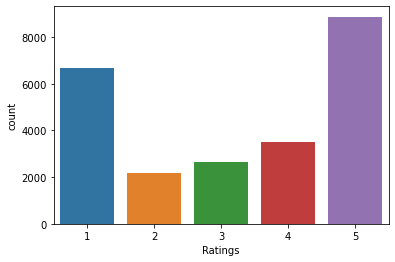

In [20]:
sns.countplot(data=df,x='Ratings')

here we can see that most of the users has rated the products as exteremities i.e, either the highes 5 start or the lowest 1 star. 2, 3 ,4 stars are quite low. we can see that our target variable is imabalanced hence we need to balance it with the help of SMOTE technique.

In [21]:
df["review_length"]=df["Review"].str.len()

<AxesSubplot:xlabel='review_length', ylabel='Ratings'>

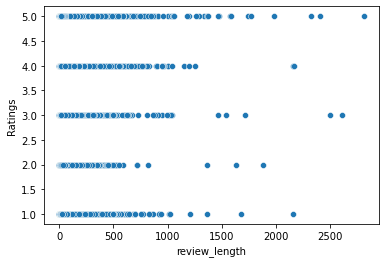

In [22]:
sns.scatterplot(data=df,x="review_length",y="Ratings")

In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [27]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [28]:
#converting reviews to lowercase
df['Cleaned_review']=df['Review'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df

,Ratings,Review,review_length,Cleaned_review
0,5,This is the best laptop in this range.I reciev...,500,this is the best laptop in this range.i reciev...
1,5,Good product as used of now.... Everything is ...,271,good product as used of now.... everything is ...
2,5,AWESOME LAPTOP. It supports many high spec gam...,96,awesome laptop. it supports many high spec gam...
3,4,For that price... it's exceptionally good. Pla...,342,for that price... it's exceptionally good. pla...
4,4,RAM upgrade is must do because the useable RAM...,500,ram upgrade is must do because the useable ram...
...,...,...,...,...
23878,4,Volume is not large but quality is best better...,139,volume is not large but quality is best better...
23879,4,thank you,9,thank you
23880,4,Better at this price,20,better at this price
23881,4,Nice product,12,nice product


In [29]:
# remove punctuation from cleaned review column
df['Cleaned_review'] = df['Cleaned_review'].str.replace('[^\w\s]','')
df

,Ratings,Review,review_length,Cleaned_review
0,5,This is the best laptop in this range.I reciev...,500,this is the best laptop in this rangei recieve...
1,5,Good product as used of now.... Everything is ...,271,good product as used of now everything is good...
2,5,AWESOME LAPTOP. It supports many high spec gam...,96,awesome laptop it supports many high spec game...
3,4,For that price... it's exceptionally good. Pla...,342,for that price its exceptionally good played f...
4,4,RAM upgrade is must do because the useable RAM...,500,ram upgrade is must do because the useable ram...
...,...,...,...,...
23878,4,Volume is not large but quality is best better...,139,volume is not large but quality is best better...
23879,4,thank you,9,thank you
23880,4,Better at this price,20,better at this price
23881,4,Nice product,12,nice product


In [30]:
# remove stopwords from cleaned review column
df['Cleaned_review'] = df['Cleaned_review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df

,Ratings,Review,review_length,Cleaned_review
0,5,This is the best laptop in this range.I reciev...,500,best laptop rangei recieved late delivery due ...
1,5,Good product as used of now.... Everything is ...,271,good product used everything good also ssd slo...
2,5,AWESOME LAPTOP. It supports many high spec gam...,96,awesome laptop supports many high spec games l...
3,4,For that price... it's exceptionally good. Pla...,342,price exceptionally good played far cry 4 ultr...
4,4,RAM upgrade is must do because the useable RAM...,500,ram upgrade must useable ram 6gb ryzen 5 3550h...
...,...,...,...,...
23878,4,Volume is not large but quality is best better...,139,volume large quality best better small hall th...
23879,4,thank you,9,thank
23880,4,Better at this price,20,better price
23881,4,Nice product,12,nice product


In [31]:
# remove digits from cleaned review column
df['Cleaned_review'] = df['Cleaned_review'].str.replace('\d+','')
df

,Ratings,Review,review_length,Cleaned_review
0,5,This is the best laptop in this range.I reciev...,500,best laptop rangei recieved late delivery due ...
1,5,Good product as used of now.... Everything is ...,271,good product used everything good also ssd slo...
2,5,AWESOME LAPTOP. It supports many high spec gam...,96,awesome laptop supports many high spec games l...
3,4,For that price... it's exceptionally good. Pla...,342,price exceptionally good played far cry ultra...
4,4,RAM upgrade is must do because the useable RAM...,500,ram upgrade must useable ram gb ryzen h great...
...,...,...,...,...
23878,4,Volume is not large but quality is best better...,139,volume large quality best better small hall th...
23879,4,thank you,9,thank
23880,4,Better at this price,20,better price
23881,4,Nice product,12,nice product


In [34]:
#nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\offic\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [35]:
df['Cleaned_review']=[lemmatizer.lemmatize(x) for x in df['Cleaned_review']]
df

,Ratings,Review,review_length,Cleaned_review
0,5,This is the best laptop in this range.I reciev...,500,best laptop rangei recieved late delivery due ...
1,5,Good product as used of now.... Everything is ...,271,good product used everything good also ssd slo...
2,5,AWESOME LAPTOP. It supports many high spec gam...,96,awesome laptop supports many high spec games l...
3,4,For that price... it's exceptionally good. Pla...,342,price exceptionally good played far cry ultra...
4,4,RAM upgrade is must do because the useable RAM...,500,ram upgrade must useable ram gb ryzen h great...
...,...,...,...,...
23878,4,Volume is not large but quality is best better...,139,volume large quality best better small hall th...
23879,4,thank you,9,thank
23880,4,Better at this price,20,better price
23881,4,Nice product,12,nice product


In [36]:
df["Cleaned_review_length"]=df["Cleaned_review"].str.len()
df

,Ratings,Review,review_length,Cleaned_review,Cleaned_review_length
0,5,This is the best laptop in this range.I reciev...,500,best laptop rangei recieved late delivery due ...,323
1,5,Good product as used of now.... Everything is ...,271,good product used everything good also ssd slo...,152
2,5,AWESOME LAPTOP. It supports many high spec gam...,96,awesome laptop supports many high spec games l...,79
3,4,For that price... it's exceptionally good. Pla...,342,price exceptionally good played far cry ultra...,234
4,4,RAM upgrade is must do because the useable RAM...,500,ram upgrade must useable ram gb ryzen h great...,348
...,...,...,...,...,...
23878,4,Volume is not large but quality is best better...,139,volume large quality best better small hall th...,101
23879,4,thank you,9,thank,5
23880,4,Better at this price,20,better price,12
23881,4,Nice product,12,nice product,12


In [37]:
t_vec=TfidfVectorizer()
feature=t_vec.fit_transform(df['Cleaned_review'])

x=feature
y=df['Ratings']

In [38]:
x.shape

(23827, 14538)

In [39]:
x_smote,y_smote=smote.fit_resample(x,y)
print(x.shape)
print(y.shape)
print(x_smote.shape)
print(y_smote.shape)

(23827, 14538)
(23827,)
(44390, 14538)
(44390,)


In [40]:
y_smote.value_counts()

1    8878
2    8878
3    8878
4    8878
5    8878
Name: Ratings, dtype: int64

In [41]:
x=x_smote.toarray()

In [42]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y_smote,test_size=0.10,random_state=42)

In [60]:
# our problem is classification type of problem.
# import useful libraries for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model = [LogisticRegression(),DecisionTreeClassifier(),MultinomialNB()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy Score:",accuracy_score(y_test,predm)*100)
    print("Confusion matrix:","\n",confusion_matrix(y_test,predm))
    print("Classification report:","\n",classification_report(y_test,predm))
    print("************************************************************")
    print("\n")

Accuracy of LogisticRegression() is:
Accuracy of training model is: 0.6109233811418988
Accuracy Score: 54.78711421491327
Confusion matrix: 
 [[554 209  78  20  25]
 [174 564 115  22  12]
 [ 87 133 438 108  80]
 [ 30 102 166 386 225]
 [ 26  55 107 233 490]]
Classification report: 
               precision    recall  f1-score   support

           1       0.64      0.63      0.63       886
           2       0.53      0.64      0.58       887
           3       0.48      0.52      0.50       846
           4       0.50      0.42      0.46       909
           5       0.59      0.54      0.56       911

    accuracy                           0.55      4439
   macro avg       0.55      0.55      0.55      4439
weighted avg       0.55      0.55      0.55      4439

************************************************************


Accuracy of DecisionTreeClassifier() is:
Accuracy of training model is: 0.8693649720908112
Accuracy Score: 60.441540887587294
Confusion matrix: 
 [[551 141  81  45  6

In [48]:
from sklearn.svm import SVC

In [49]:
model = [SVC()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy Score:",accuracy_score(y_test,predm)*100)
    print("Confusion matrix:","\n",confusion_matrix(y_test,predm))
    print("Classification report:","\n",classification_report(y_test,predm))
    print("************************************************************")
    print("\n")

Accuracy of SVC() is:
Accuracy of training model is: 0.7779529924157093
Accuracy Score: 67.0646542013967
Confusion matrix: 
 [[655 128  47   9  47]
 [ 88 694  73  16  16]
 [ 75  70 532  62 107]
 [ 31  79 117 430 252]
 [ 42  10  87 106 666]]
Classification report: 
               precision    recall  f1-score   support

           1       0.74      0.74      0.74       886
           2       0.71      0.78      0.74       887
           3       0.62      0.63      0.63       846
           4       0.69      0.47      0.56       909
           5       0.61      0.73      0.67       911

    accuracy                           0.67      4439
   macro avg       0.67      0.67      0.67      4439
weighted avg       0.67      0.67      0.67      4439

************************************************************




In [61]:
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    trainrf = rf.score(x_train,y_train)
    predrf = rf.predict(x_test)
    print("Accuracy of",rf,"is:")
    print("Accuracy of training model is:",trainrf)
    print("Accuracy Score:",accuracy_score(y_test,predrf)*100)
    print("Confusion matrix:","\n",confusion_matrix(y_test,predrf))
    print("Classification report:","\n",classification_report(y_test,predrf))

Accuracy of RandomForestClassifier() is:
Accuracy of training model is: 0.8693649720908112
Accuracy Score: 72.15589096643387
Confusion matrix: 
 [[655 106  57  16  52]
 [ 57 745  58  18   9]
 [ 47  34 624  55  86]
 [ 18  24 117 577 173]
 [ 40  22  88 159 602]]
Classification report: 
               precision    recall  f1-score   support

           1       0.80      0.74      0.77       886
           2       0.80      0.84      0.82       887
           3       0.66      0.74      0.70       846
           4       0.70      0.63      0.67       909
           5       0.65      0.66      0.66       911

    accuracy                           0.72      4439
   macro avg       0.72      0.72      0.72      4439
weighted avg       0.72      0.72      0.72      4439



In [66]:
# Save best model
import joblib
joblib.dump(rf,"rf_ratingprediction.pkl")

['rf_ratingprediction.pkl']